# Using small multiples
- Graphs that use many small plots to show different subsets of the data
- Plots use same ranges for the x- and y-axis
- In ggplot2, can use faceting to create small multiples

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(ggthemes)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Load "worldcup" Dataset

In [2]:
worldcup <- read_csv("Data/worldcup.csv")

worldcup <- worldcup %>%
  select(player_name, everything()) %>%
  rename(Name = player_name)

head(worldcup)

Parsed with column specification:
cols(
  Team = col_character(),
  Position = col_character(),
  Time = col_integer(),
  Shots = col_integer(),
  Passes = col_integer(),
  Tackles = col_integer(),
  Saves = col_integer(),
  player_name = col_character()
)


Name,Team,Position,Time,Shots,Passes,Tackles,Saves
Abdoun,Algeria,Midfielder,16,0,6,0,0
Abe,Japan,Midfielder,351,0,101,14,0
Abidal,France,Defender,180,0,91,6,0
Abou Diaby,France,Midfielder,270,1,111,5,0
Aboubakar,Cameroon,Forward,46,2,16,0,0
Abreu,Uruguay,Forward,72,0,15,0,0


### Using color to see Relationship between "Time" played and "Shots" based on Position

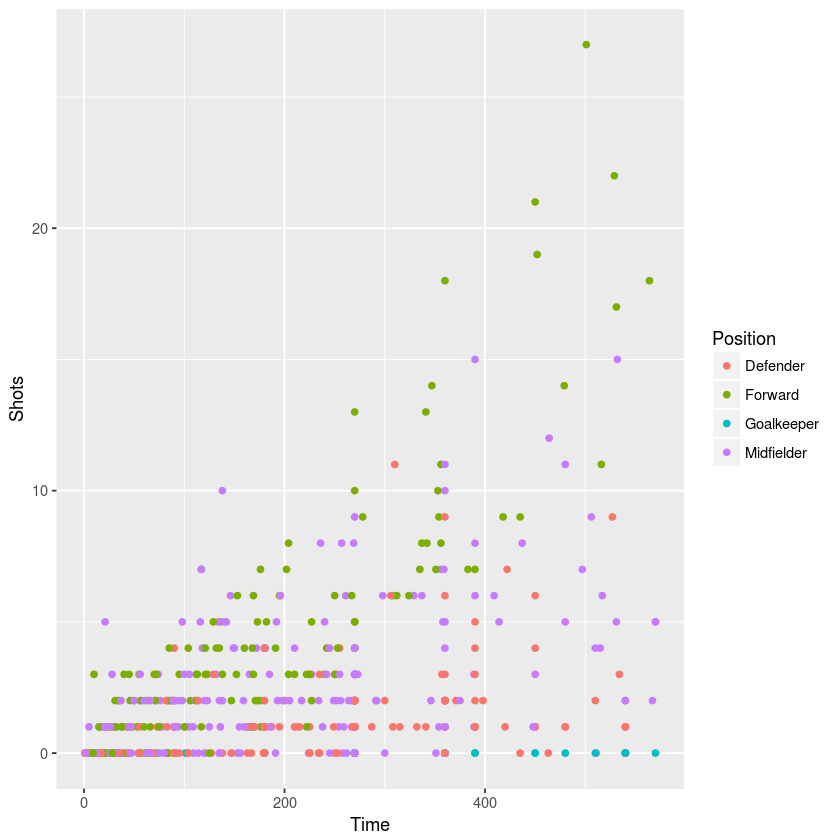

In [3]:
worldcup %>%
  ggplot(aes(x = Time, y = Shots, color = Position)) +
  geom_point()

### Can represent Relationship clearer by using faceting

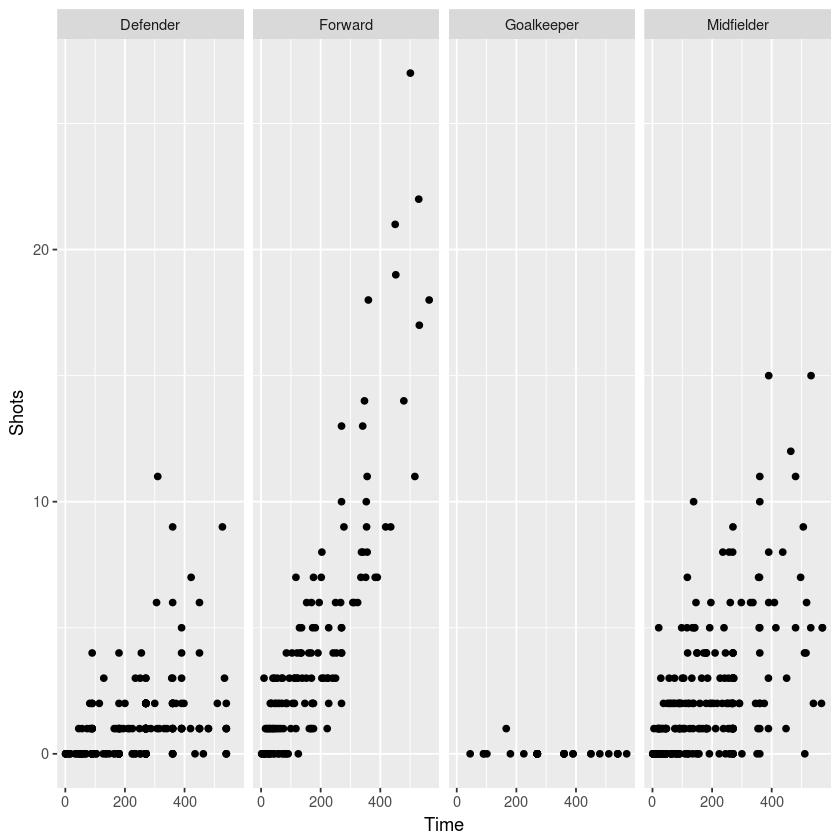

In [4]:
worldcup %>%
  ggplot(aes(x = Time, y = Shots)) +
  geom_point() +
  facet_grid(. ~ Position)

# Faceting:
- Can be done with facet_grid() function or facet_wrap() function
- facet_grid() function: plots are placed with one faceting varibale per dimension
    - facet_grid([factor for rows] ~ [factors for columns])
- facet_wrap() function: plots are wrapped across several rows
    - facet_wrap([formula with factors for faceting], ncol = [number of columns]])

## facet_grid():
- Show Relationship for  final 2 Teams in Worldcup 2010 (Spain and Holland)
- Facet by Position and Team

In [5]:
worldcup %>%
  filter(Team %in% c("Spain", "Netherlands")) %>%
  head()

Name,Team,Position,Time,Shots,Passes,Tackles,Saves
Afellay,Netherlands,Midfielder,21,5,22,0,0
Alonso,Spain,Midfielder,506,9,465,18,0
Arbeloa,Spain,Defender,13,0,12,0,0
Boulahrouz,Netherlands,Defender,180,0,81,8,0
Busquets,Spain,Midfielder,511,0,466,15,0
Capdevila,Spain,Defender,540,1,310,10,0


#### Plotting Shots by Position for Both Teams 

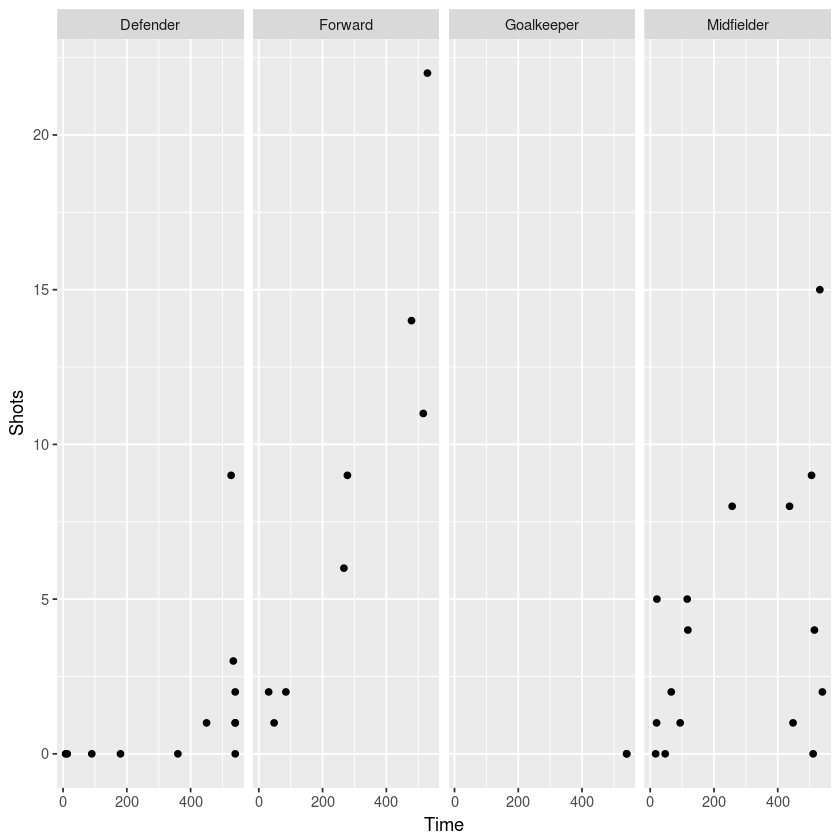

In [6]:
worldcup %>%
  filter(Team %in% c("Spain", "Netherlands")) %>%
  ggplot(aes(x = Time, y = Shots)) +
  geom_point() +
  facet_grid(. ~ Position)

#### Plotting Shots by Position for Separate Team

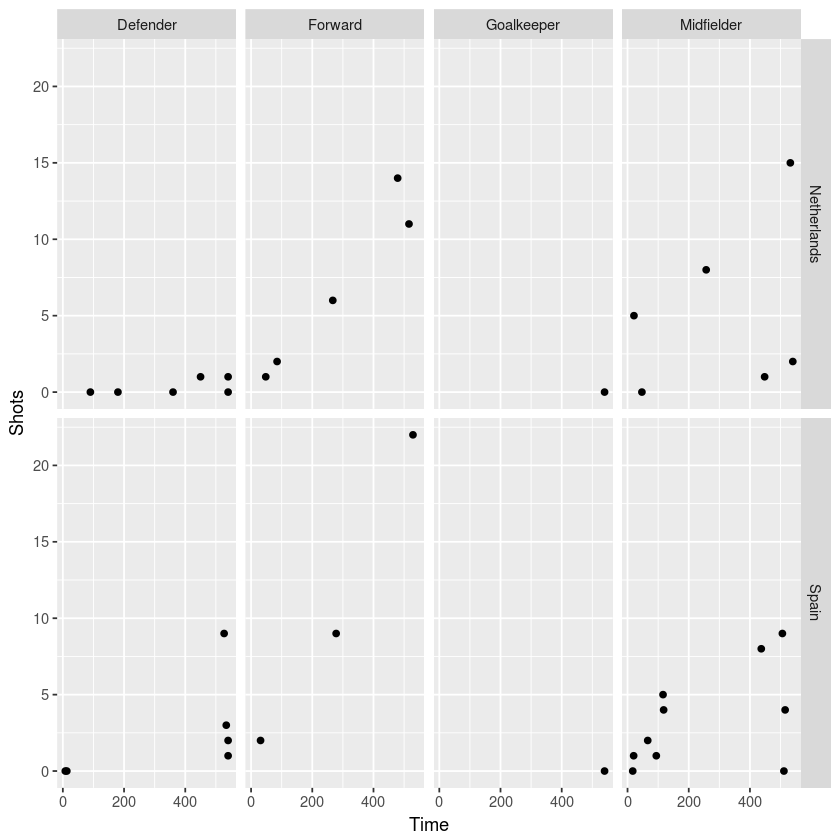

In [7]:
worldcup %>%
  filter(Team %in% c("Spain", "Netherlands")) %>%
  ggplot(aes(x = Time, y = Shots)) +
  geom_point() +
  facet_grid(Team ~ Position)

## facet_wrap():
- Can specify how many columns to use, when faceting across many varibales
- Create a faceted graph of Time played versus Shots taken by Team (32 temas)

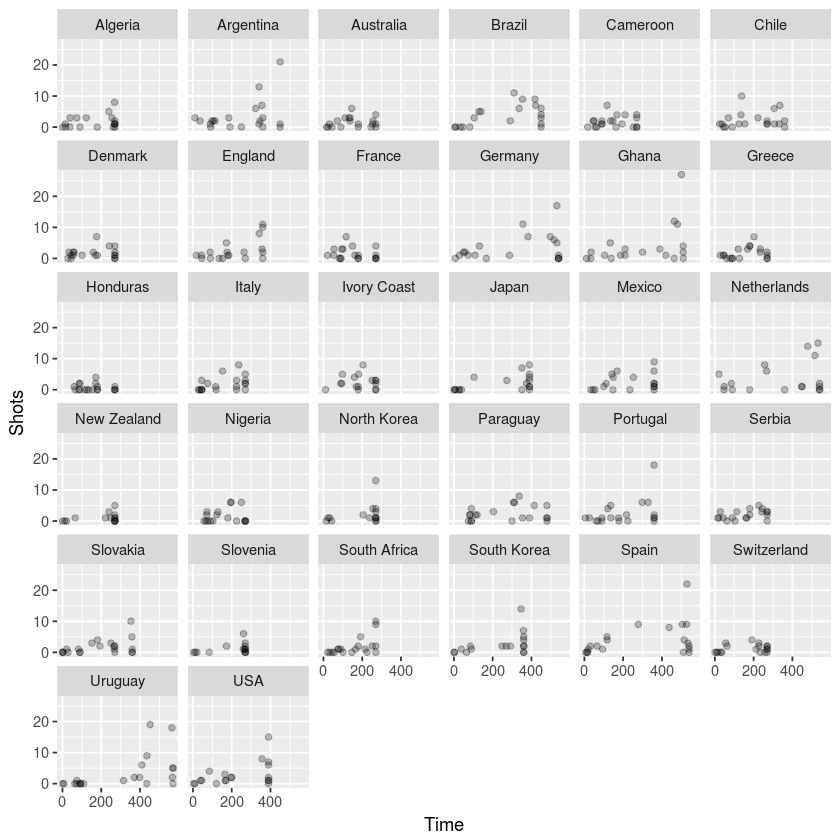

In [8]:
worldcup %>%
  ggplot(aes(x = Time, y = Shots)) +
  geom_point(alpha = 0.25) +
  facet_wrap( ~ Team, ncol = 6)

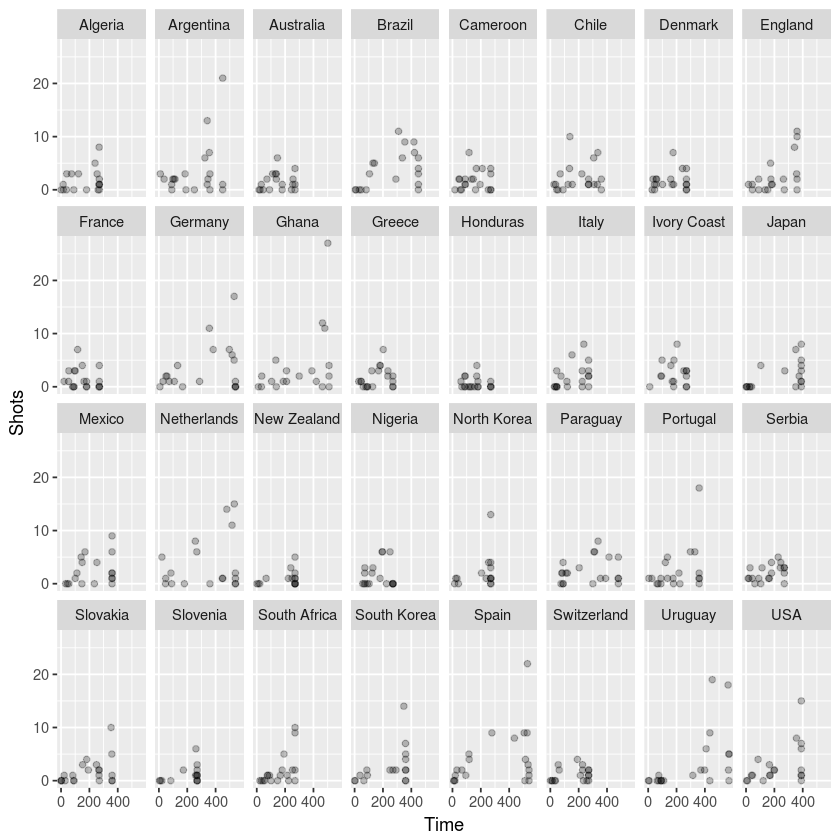

In [9]:
worldcup %>%
  ggplot(aes(x = Time, y = Shots)) +
  geom_point(alpha = 0.25) +
  facet_wrap( ~ Team, ncol = 8)

<hr>

# Re-name or re-order factors levels:
- Use a factor() function on the original vector, or use "forcats" package

### Load Dataset Plot 
- Using locally stored  "nepali" dataset
- Convert id Variable to a factor, to use distinct later on 
- convert sex to a factor with levels 1 and 2, and labels "Male" and "Female"
- Limit the dataset to the first measurement for each child using distinct() function from dplyr

In [10]:
nepali <- read_csv("Data/nepali.csv")

nepali <- nepali %>% 
  select(id, sex, wt, ht, age) %>%
  mutate(id = factor(id), sex = factor(sex, levels = c(1,2), labels = c("Male", "Female"))) %>%
  distinct(id, .keep_all = TRUE)

head(nepali)

Parsed with column specification:
cols(
  id = col_integer(),
  sex = col_integer(),
  wt = col_double(),
  ht = col_double(),
  mage = col_integer(),
  lit = col_integer(),
  died = col_integer(),
  alive = col_integer(),
  age = col_integer()
)


id,sex,wt,ht,age
120011,Male,12.8,91.2,41
120012,Female,14.9,103.9,57
120021,Female,7.7,70.1,8
120022,Female,12.1,86.4,35
120023,Male,14.2,99.4,49
120031,Male,13.9,96.4,46


### Using Color to represent Relationship between Height and Weight based on Gender 

Warning message:
“Removed 15 rows containing missing values (geom_point).”

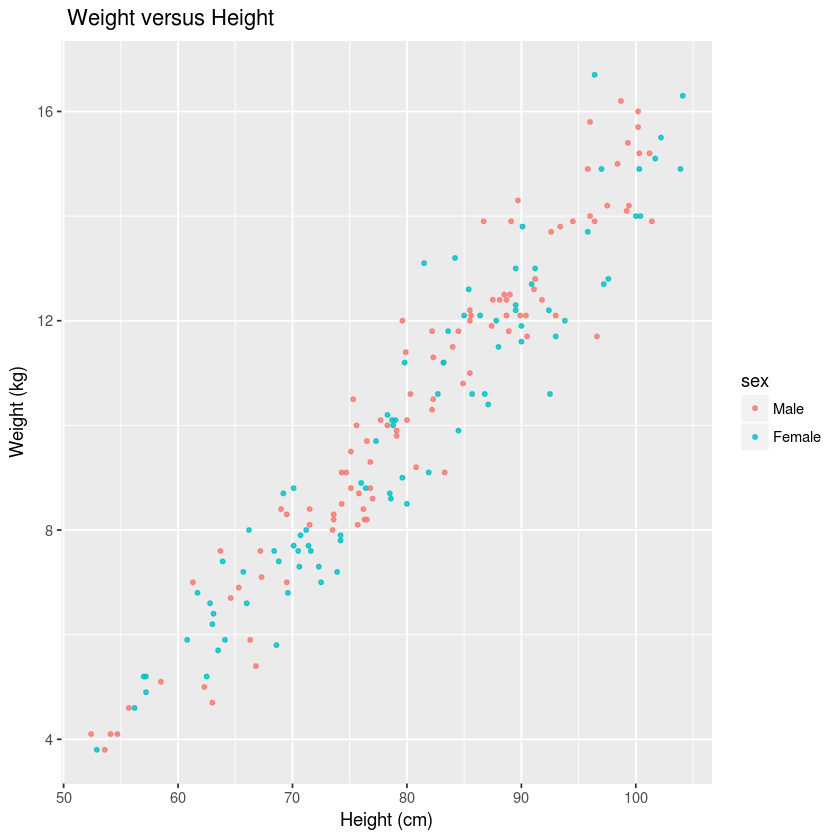

In [11]:
nepali %>%
  ggplot(aes(x = ht, y = wt, color = sex)) + 
  geom_point(size = 1, alpha = 0.8) +
  ggtitle(" Weight versus Height") +
  xlab("Height (cm)") +
  ylab("Weight (kg)")

### Represent Relationship clearer by using faceting

Warning message:
“Removed 15 rows containing missing values (geom_point).”

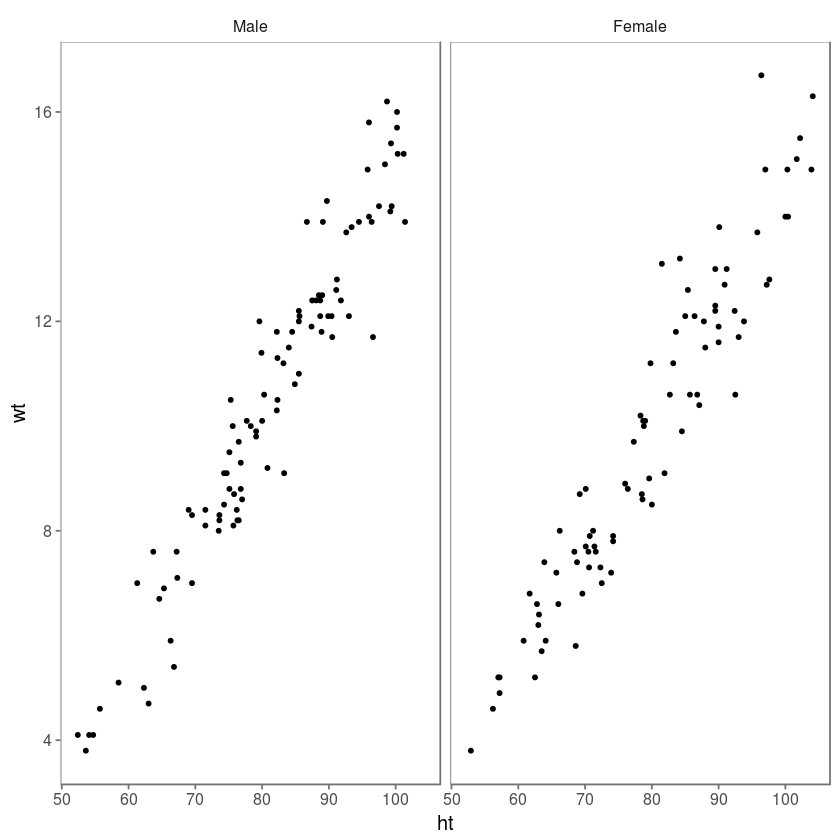

In [12]:
nepali %>%
  ggplot(aes(x = ht, y = wt)) + 
  geom_point(size = 1) +
  facet_grid(. ~ sex) +
  theme_few()

### Re-order the factor to show Female first

Warning message:
“Removed 15 rows containing missing values (geom_point).”

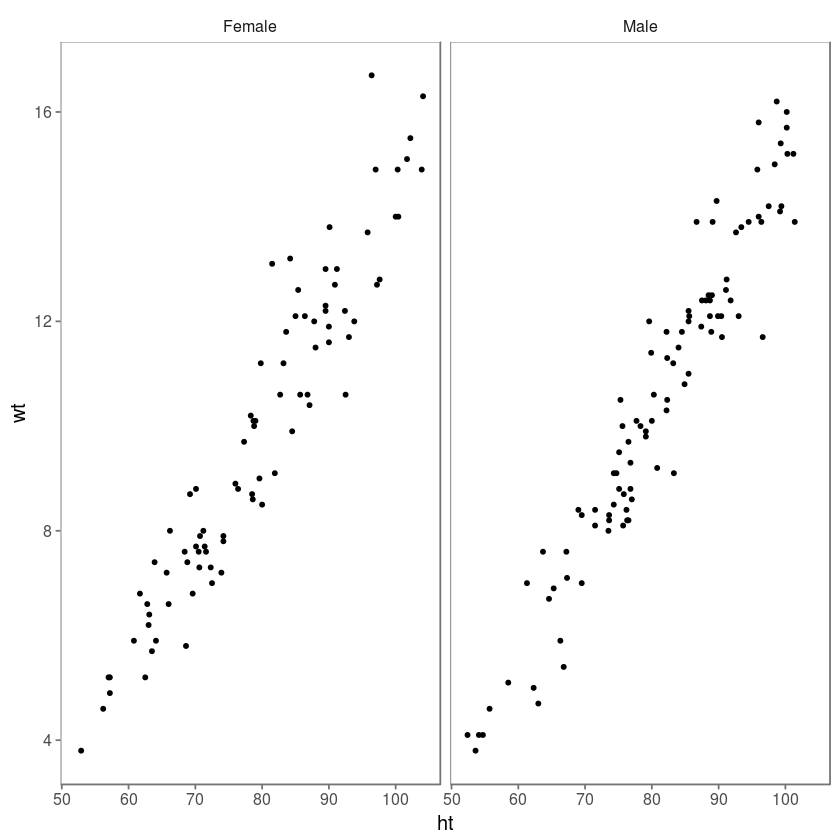

In [13]:
nepali %>%
  mutate(sex = factor(sex, levels = c("Female", "Male"))) %>%
  ggplot(aes(x = ht, y = wt)) + 
  geom_point(size = 1) +
  facet_grid(. ~ sex) +
  theme_few()